In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [85]:
x1 = None
x2 = None
y1 = None
y2 = None

In [86]:
filename = "1.csv"
df = pd.read_csv(filename, delimiter=";", decimal=".")

df

,A,T
0,0.10,110.0
1,0.20,206.5
2,0.30,306.4
3,0.40,408.0
4,0.50,501.0
5,0.60,596.0
6,0.70,686.0
7,0.80,756.0
8,0.90,823.0
9,1.00,879.0


In [87]:
plt.rcParams["figure.dpi"] = 300

style_scatter = ".r"

style_line = "--.k"

In [88]:
def curve(x, a5, a4, a3, a2, a1, a0):
    return a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x


icurve = lambda x: curve(*(x, *popt))

In [89]:
xdata = df.A
ydata = df["T"]

popt, pcov = curve_fit(curve, xdata, ydata)
popt

C:\Users\stg05\AppData\Local\Temp\ipykernel_19072\1754078240.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(curve, xdata, ydata)


array([ 1.42269599e+02, -3.78553271e+02,  1.31654033e+02, -6.06063235e+01,
        1.04507052e+03,  1.00000000e+00])

In [90]:
icurve(1.0)

np.float64(879.8345524565632)

In [91]:
df["dT"] = df["T"].apply(lambda x: x * 0.05 + 0.1)


df["dA"] = df["A"].apply(lambda x: x * 0.01)
for a in df["dA"].to_numpy():
    print("{:.0f} & ".format(1000 * a), end="")

1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 

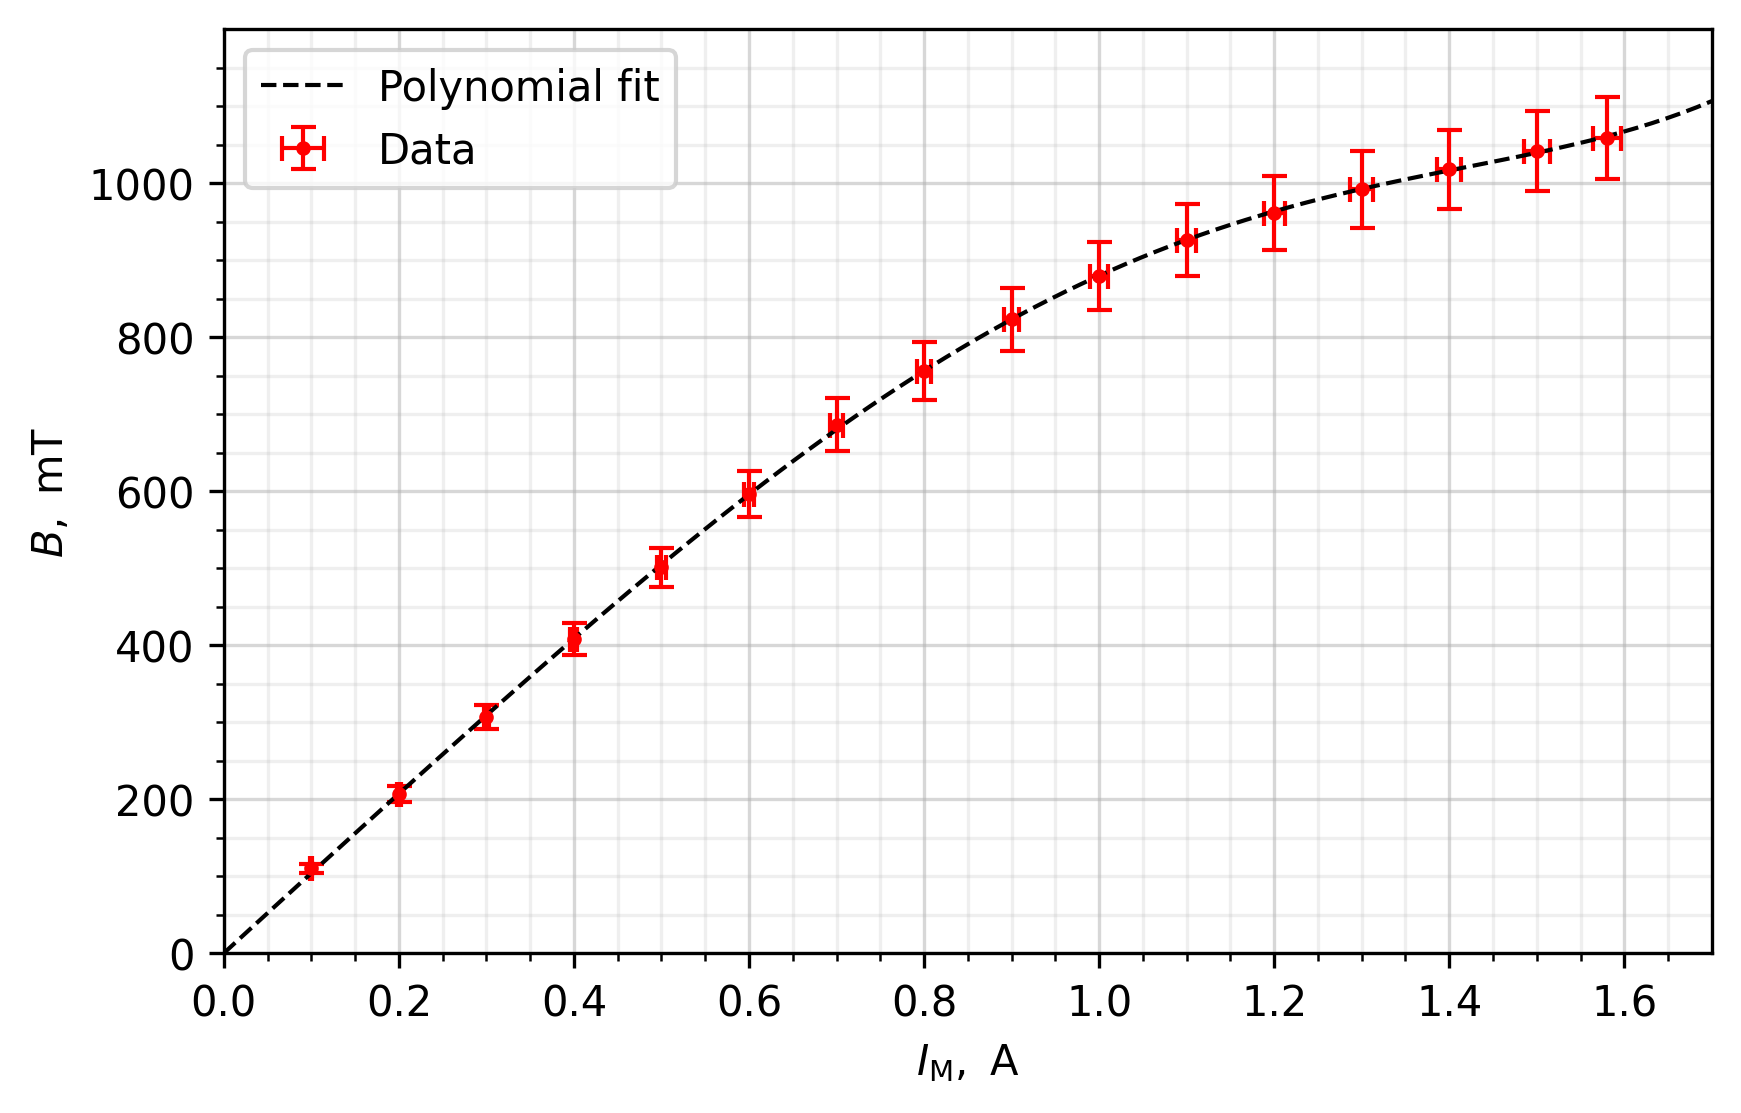

In [92]:
fig = plt.figure(figsize=(6.4, 4.0))
ax = fig.add_subplot(111)

ax.set_ylim((0, 1200))
ax.set_xlim((0, 1.7))
ax.set_ylabel(r"$B,~\mathrm{mT}$")
ax.set_xlabel(r"$I_\text{M},~\mathrm{A}$")


ax.set_yticks(np.arange(0, 1200, 200))
ax.set_yticks(np.arange(0, 1200, 50), minor=True)
ax.set_xticks(np.arange(0, 1.7, 0.05), minor=True)
ax.set_xticks(np.arange(0, 1.7, 0.2))

ls = np.linspace(0, 1.7, 100)


ax.errorbar(
    xdata,
    ydata,
    xerr=df.dA,
    yerr=df["dT"],
    capsize=3,
    fmt=".r",
    ms=5,
    lw=1,
    label="Data",
)

ax.plot(ls, icurve((ls)), "--k", lw=1, label="Polynomial fit")
ax.legend()
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
# k,b

In [93]:
filenames = [
    "0_30mA.csv",
    "0_40mA.csv",
    "0_50mA.csv",
    "0_60mA.csv",
    "0_70mA.csv",
    "0_80mA.csv",
    "0_90mA.csv",
    "1_00mA.csv",
]
df = []
for file in filenames:
    df.append(pd.read_csv(file, delimiter=";", decimal="."))

icurve(df[6].A)

0        0.000000
1      103.996210
2      207.082923
3      308.900678
4      408.522929
5      504.626776
6      595.663684
7      680.030207
8      756.238712
9      823.088106
10     879.834552
11     926.362201
12     963.353907
13     992.461958
14    1016.478795
15    1039.507738
Name: A, dtype: float64

0.05736300430590797
0.076630247001371
0.09515303497361556
0.1154151070360612
0.1354451522899788
0.15420535778942035
0.17308471945727488
0.1915210931357646


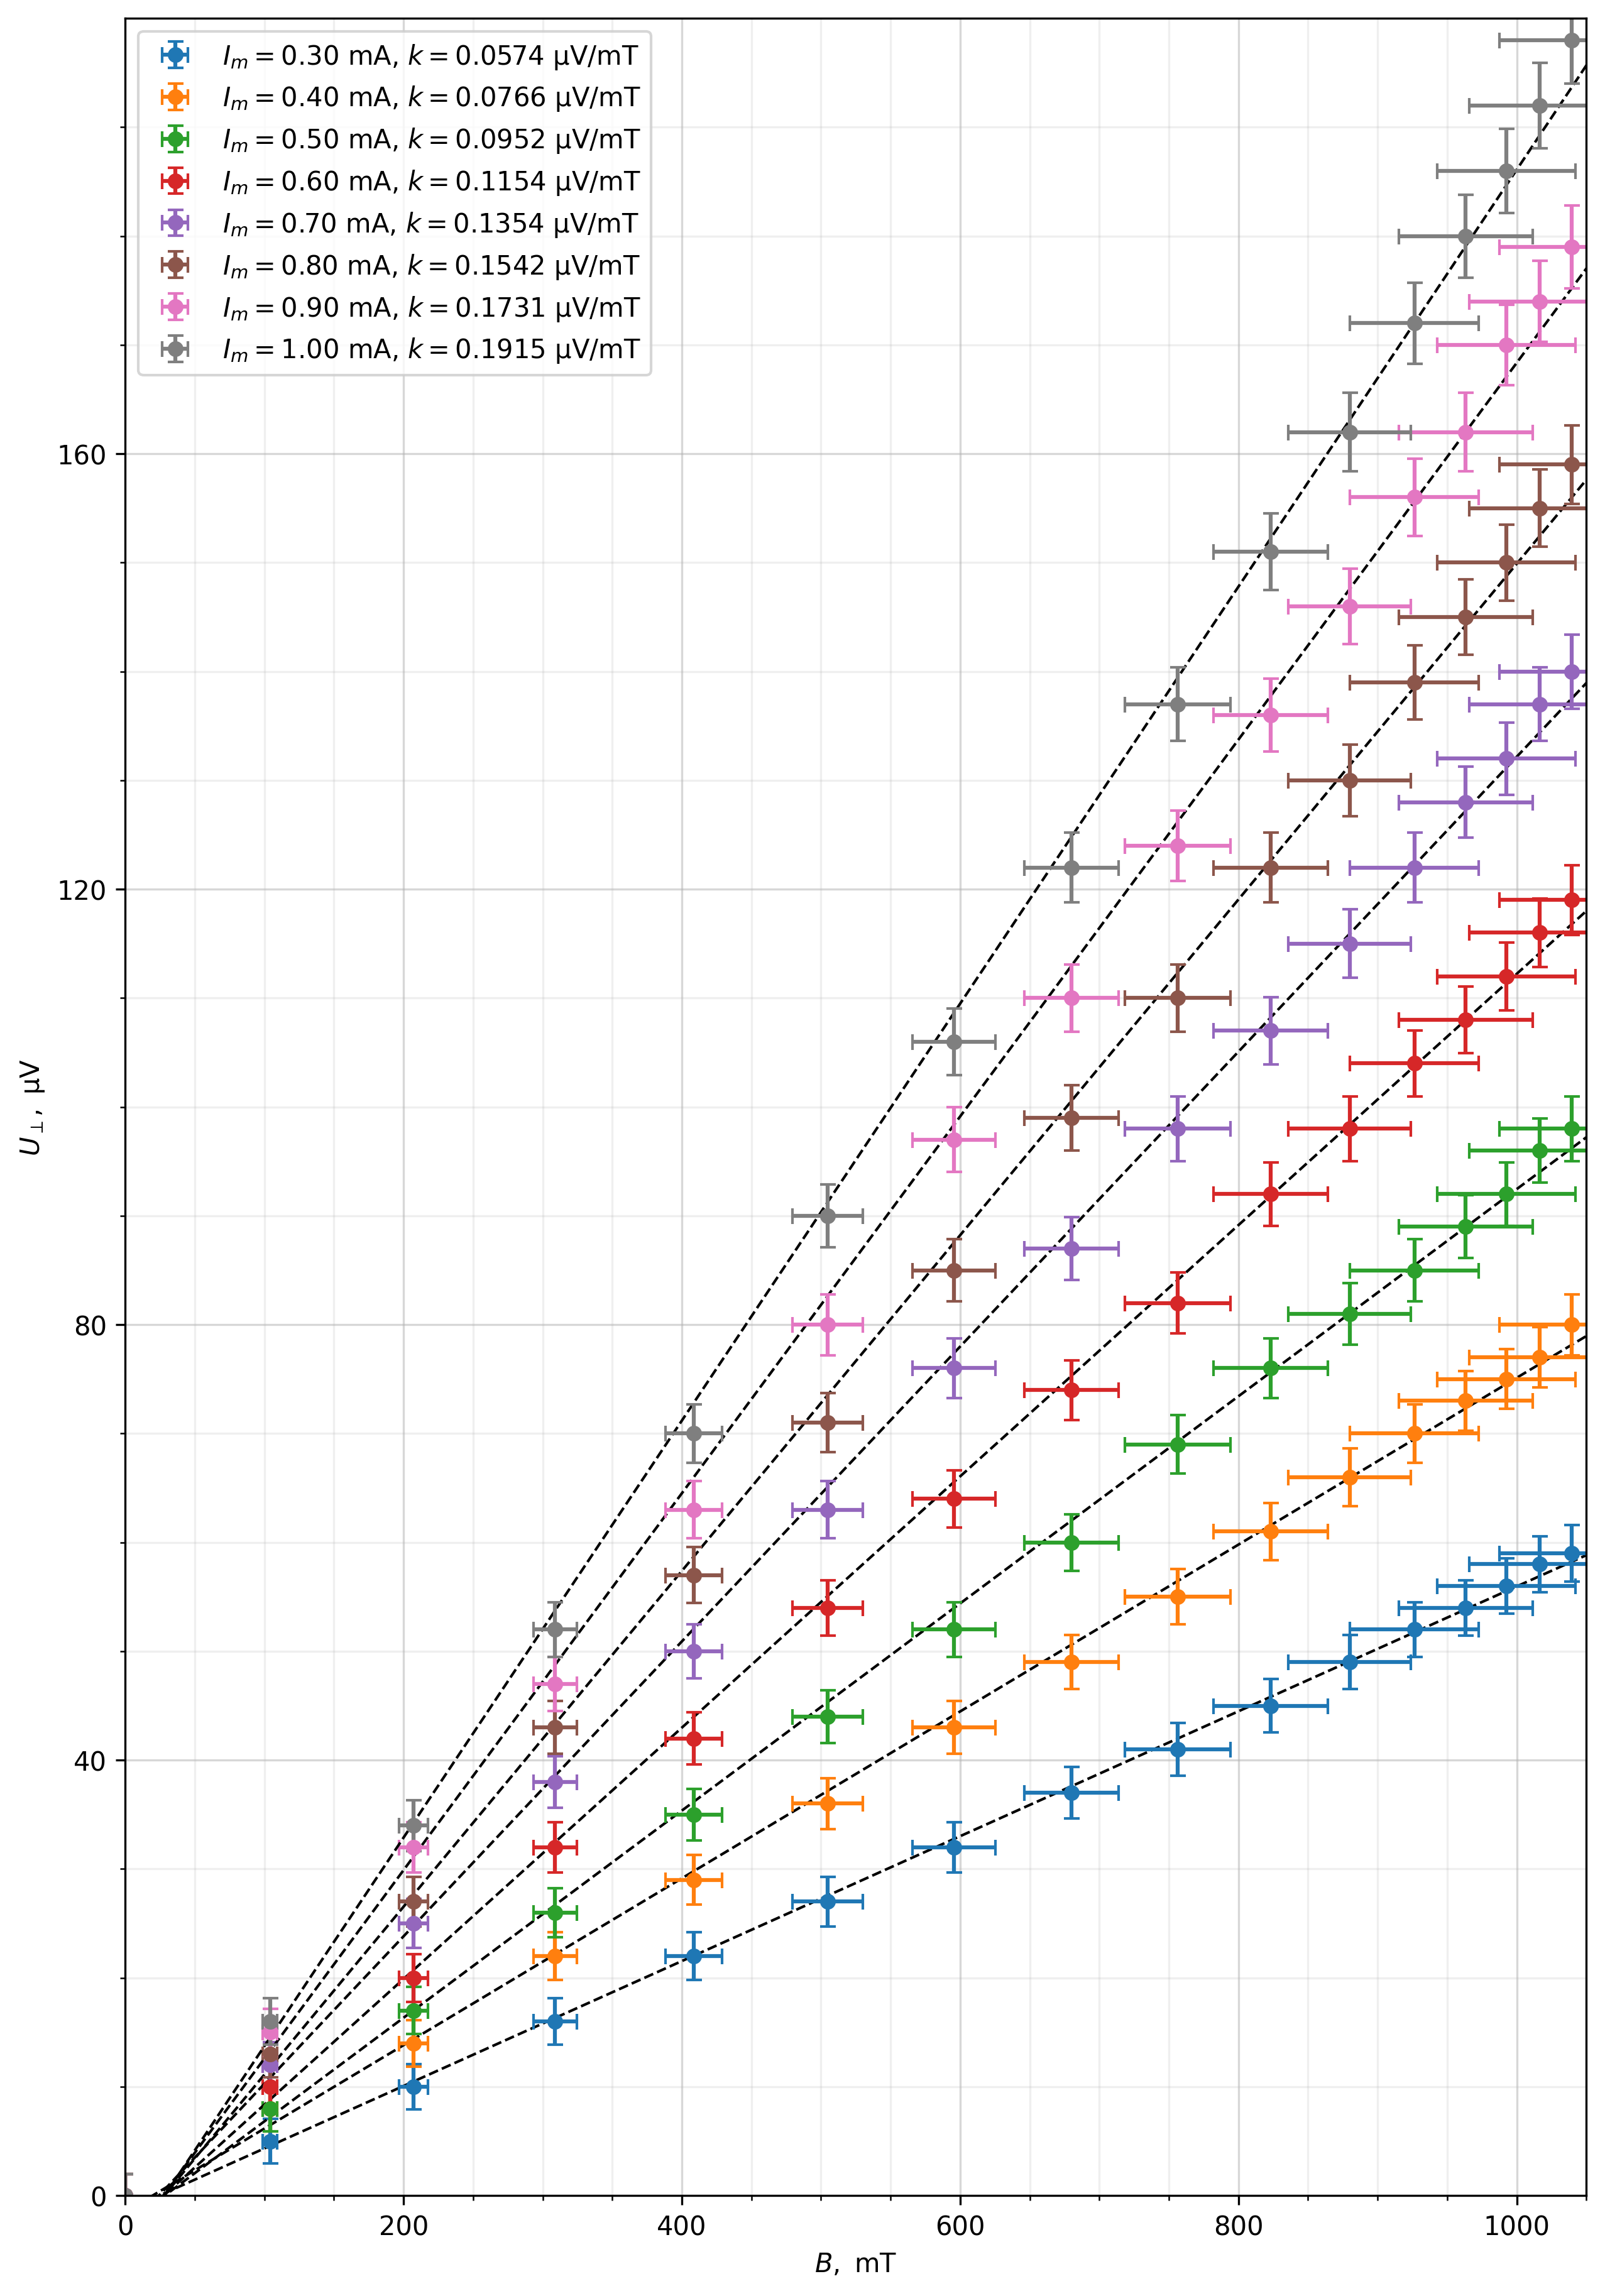

In [94]:
fig = plt.figure(figsize=(10.0, 15.0))
ax = fig.add_subplot(111)

ax.set_ylim((0, 200))
ax.set_xlim((0, 1.7))
ax.set_ylabel(r"$U_{\perp},~\mathrm{\mu V}$")
ax.set_xlabel(r"$B,~\mathrm{mT}$")


ax.set_yticks(np.arange(0, 200, 40))
ax.set_yticks(np.arange(0, 200, 10), minor=True)
ax.set_xticks(np.arange(0, 1100, 50), minor=True)
ax.set_xticks(np.arange(0, 1100, 200))

ls = np.linspace(0, 1100, 100)


def curve_linear(x, k, b):
    return k * x + b


for i in range(0, 8):
    (k, b), pcov = curve_fit(curve_linear, icurve(df[i].A), df[i].uVn)
    ax.plot(ls, curve_linear(ls, k, b), "--k", lw=1)
    # ax.plot(icurve(df[i].A), df[i].uVn, '.', ms=10, label=r'$I_m = $'+'{:.2f}'.format((i+3)*0.1)+r'$~\mathrm{A}$, '+r'$k = $' + '{:.4f}'.format(k)+r'$~\mathrm{\mu V / A}$')
    ax.errorbar(
        icurve(df[i].A),
        df[i].uVn,
        xerr=0.05 * icurve(df[i].A),
        yerr=0.01 * df[i].uVn + 2,
        fmt=".",
        ms=10,
        label=r"$I_m = $"
        + "{:.2f}".format((i + 3) * 0.1)
        + r"$~\mathrm{mA}$, "
        + r"$k = $"
        + "{:.4f}".format(k)
        + r"$~\mathrm{\mu V / mT}$",
        capsize = 3
    )
    print(k)

# ax.plot(ls, icurve((ls)), '--k', lw=1, label='Polynomial fit')
ax.legend()
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
# k,b

In [96]:
karr = np.array([0.0574, 0.0766, 0.0952, 0.1154, 0.1354, 0.1542, 0.1731, 0.1915])
I = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [97]:
(k, b), pcov = curve_fit(curve_linear, I, karr)
np.diag(pcov)[0]**0.5, k

(np.float64(0.0009483545822574475), np.float64(0.19264285714285717))

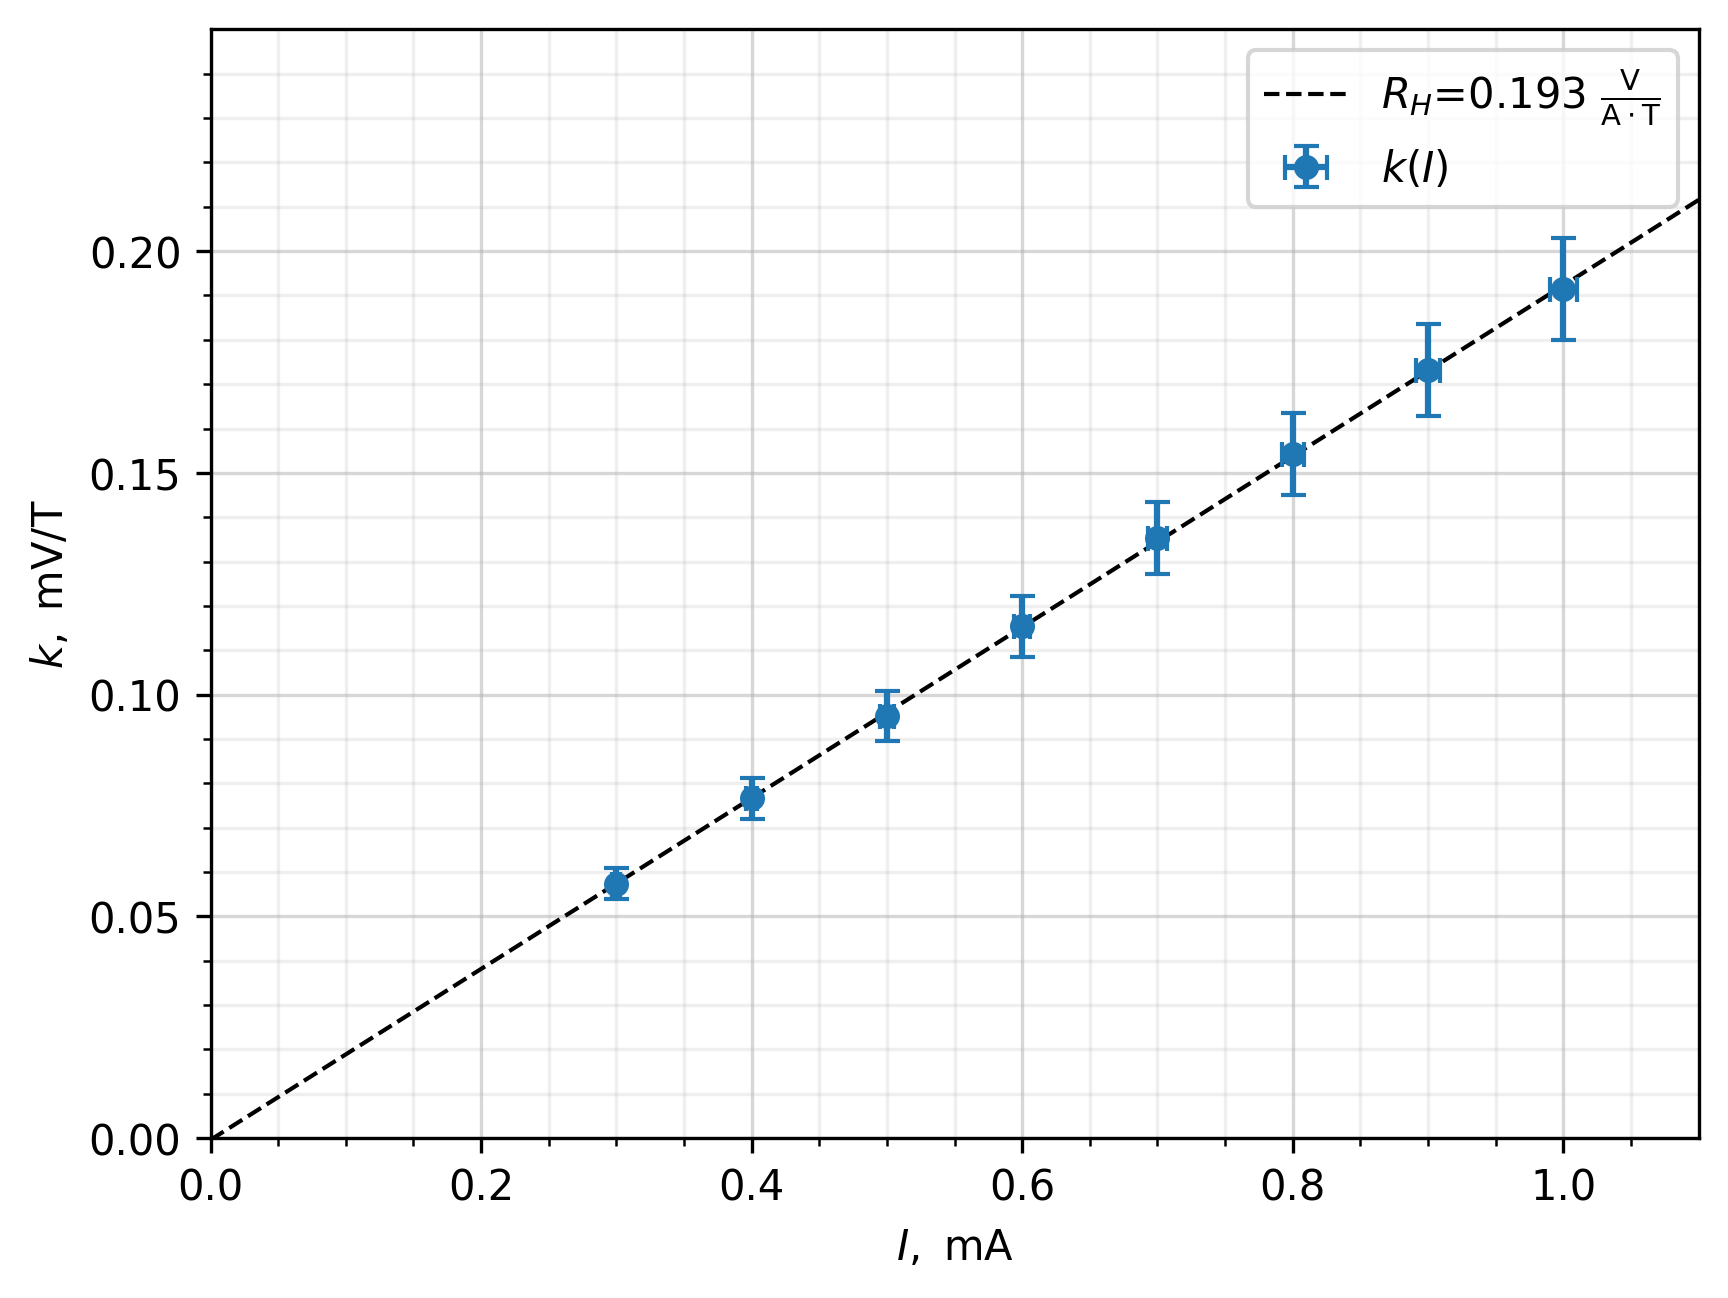

In [98]:
fig = plt.figure(figsize=(6.4, 4.8))
ax = fig.add_subplot(111)

ax.set_ylim((0, 0.25))
ax.set_xlim((0, 1.1))
ax.set_ylabel(r"$k,~\mathrm{mV / T}$")
ax.set_xlabel(r"$I,~\mathrm{mA}$")


ax.set_yticks(np.arange(0, 0.25, 0.05))
ax.set_yticks(np.arange(0, 0.25, 0.01), minor=True)
ax.set_xticks(np.arange(0, 1.1, 0.05), minor=True)
ax.set_xticks(np.arange(0, 1.1, 0.2))

ls = np.linspace(0, 1.1, 100)


def curve_linear(x, k, b):
    return k * x + b

ax.plot(ls, curve_linear(ls, k, b), '--k', lw=1, label='$R_H$={:.3f}'.format(k)+r'$~\mathrm{\frac{V}{A\cdot T}}$')

ax.errorbar(
    I,
    karr,
    xerr=0.01*I,
    yerr=0.06 * karr,
    fmt=".",
    ms=10,
    label=r"$k(I)$",
    capsize=3,
)

# ax.plot(ls, icurve((ls)), '--k', lw=1, label='Polynomial fit')
ax.legend()
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)

In [82]:
df = pd.DataFrame()
df['I'] = I
df['k'] = karr
print(df.T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\midrule
I & 0.300000 & 0.400000 & 0.500000 & 0.600000 & 0.700000 & 0.800000 & 0.900000 & 1.000000 \\
k & 0.057400 & 0.076600 & 0.095200 & 0.115400 & 0.135400 & 0.154200 & 0.173100 & 0.191500 \\
\bottomrule
\end{tabular}

